# Examples : MATLAB / Octave

This notebook is intended as a brief introduction to the industry standard programming language MATLAB (MATrix LABoratory). While much of science is rapidly converging to use python as an open-source (and free) language that is sufficiently powerful for most scientific computing tasks, many still use MATLAB since it is older and more established. Many also still use C++, C, and even FORTRAN for scientific computing, but those languages are beyond the scope of this introductory course.

The main goal of introducing you to MATLAB at this stage of the course is to demonstrate that it is simple to learn once you already have a good understanding of how `numpy` arrays work. Most of the skills from learning python are directly transferrable with only slight modifications. The main restriction of MATLAB compared to python is that complex code organization, like classes or nested functions, are not allowed in MATLAB: only simple functions should be used to organize your code most of the time.

The core philosophy of MATLAB is simple:
 - Numbers are ints, floats, or complex numbers (e.g., numbers of the form ($a + i b$) where $a$ and $b$ are floats and i is the imaginary unit such that $i^2 = -1$), and autoconvert between numeric types automatically.
 - Everything else is a matrix of numbers.
 - All computation should be done with clever uses of matrix products.
 - Matrices should be indexed starting at 1, not 0. Similarly, the last index should be 'end', not -1.

While the modern MATLAB language adds many new features (like classes), almost all MATLAB code in practice that is effective and efficient follows the above philosophy.

On top of this philosophy, there are only two organizational rules:
 - Each function should be defined in a separate file with extension .m
 - A script also has extension .m, and should run the user-defined functions the same way as MATLAB-defined functions.

Below we will demonstrate these features within Jupyter first by using a free clone of MATLAB known as Octave. (Notice that the kernel of this notebook in the upper-right corner has been changed to Octave.) Octave is useful for showing MATLAB syntax, but is much much slower than MATLAB when executing code. If possible, you should use MATLAB rather than Octave for real computational work.

## Derivative Matrix Example

In [1]:
# Note: Comments in Octave are hashes, like in Python.  Comments in MATLAB are percent signs %

n = 5;                        # Set n to 5, semicolon suppresses output (otherwise all output is printed)
d = zeros(n,n);               # nxn matrix of zeros
d(2:end,1:end-1) = -eye(n-1); # Set lower off-diagonal to -1 using (n-1)x(n-1) identity matrix
d(1:end-1,2:end) = d(1:end-1,2:end) + eye(n-1); # Set upper off-diagonal to +1 using (n-1)x(n-1) identity matrix
d = d ./ 2;                   # Divide all elements of e by 2
d(1,1) = -1;
d(end,end-1) = -1;            # Set multiple matrix elements to -1. Note (row, column) convention.
d(end,end) = 1;
d(1,2) = 1                    # Set multiple matrix elements to +1. Do not suppress output.

d =

  -1.00000   1.00000   0.00000   0.00000   0.00000
  -0.50000   0.00000   0.50000   0.00000   0.00000
   0.00000  -0.50000   0.00000   0.50000   0.00000
   0.00000   0.00000  -0.50000   0.00000   0.50000
   0.00000   0.00000   0.00000  -1.00000   1.00000



In [2]:
# Function version of above: normally this must be put in a file "derivative.m" with nothing else in the file
function returnvalue = derivative(a, b, n)
  dx = (b-a)/(n-1);             # Define the step dx from the provided arguments
  d = zeros(n,n);               # nxn matrix of zeros
  d(2:end,1:end-1) = -eye(n-1); # Set lower off-diagonal to -1 using (n-1)x(n-1) identity matrix
  d(1:end-1,2:end) = d(1:end-1,2:end) + eye(n-1); # Set upper off-diagonal to +1 using (n-1)x(n-1) identity matrix
  d = d ./ 2;                   # Divide all elements of d by 2
  d(1,1) = -1;
  d(end,end-1) = -1;            # Set multiple matrix elements to -1. Note (row, column) convention.
  d(end,end) = 1;
  d(1,2) = 1;                   # Set multiple matrix elements to +1. Do not suppress output.
  returnvalue = d ./ dx;        # Divide all elements of d by dx
end

# Note the syntax for a function:

# function retval = funcname(argnames)
#   (body of funcname here)
# end

# Inside the function, the variable retval must be defined, which will be the returned value of the function

In [3]:
d = derivative(0,4,5)

d =

  -1.00000   1.00000   0.00000   0.00000   0.00000
  -0.50000   0.00000   0.50000   0.00000   0.00000
   0.00000  -0.50000   0.00000   0.50000   0.00000
   0.00000   0.00000  -0.50000   0.00000   0.50000
   0.00000   0.00000   0.00000  -1.00000   1.00000



In [4]:
d = derivative(0,4,8)

d =

  -1.75000   1.75000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.87500   0.00000   0.87500   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000  -0.87500   0.00000   0.87500   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000  -0.87500   0.00000   0.87500   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.87500   0.00000   0.87500   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000  -0.87500   0.00000   0.87500   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.87500   0.00000   0.87500
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -1.75000   1.75000



In [5]:
x = linspace(0,4,8)         # (row) vector of length n storing domain of points between 0 and n-1
x'                          # (column) vector obtained by taking the (complex) transpose of v with '
d * x'                      # matrix product of square matrix e by column vector v' - results in column vector
                            # Note that matrix product is * rather than @ in python
                            # Note that element-wise product is .* rather than * in python
x * d                       # matrix product of row vector v by square matrix e - results in row vector
x * d * x'                  # matrix product of row vector v by square matrix e by column vector v' - results in single number (matrix with one element)

x =

   0.00000   0.57143   1.14286   1.71429   2.28571   2.85714   3.42857   4.00000

ans =

   0.00000
   0.57143
   1.14286
   1.71429
   2.28571
   2.85714
   3.42857
   4.00000

ans =

   1.00000
   1.00000
   1.00000
   1.00000
   1.00000
   1.00000
   1.00000
   1.00000

ans =

 Columns 1 through 7:

   -0.50000   -1.00000   -1.00000   -1.00000   -1.00000   -1.00000   -4.50000

 Column 8:

   10.00000

ans =  16.000


## Plotting Example

The python package ```matplotlib``` was based off MATLAB syntax for plotting, so plotting should look very familiar in MATLAB.

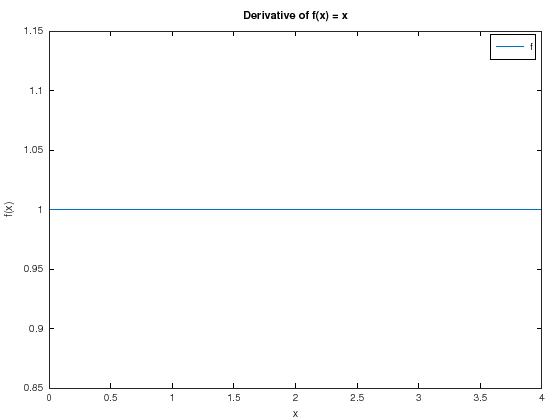

In [6]:
plot(x, d * x')
title("Derivative of f(x) = x")
xlabel("x")
ylabel("f(x)")
legend("f")

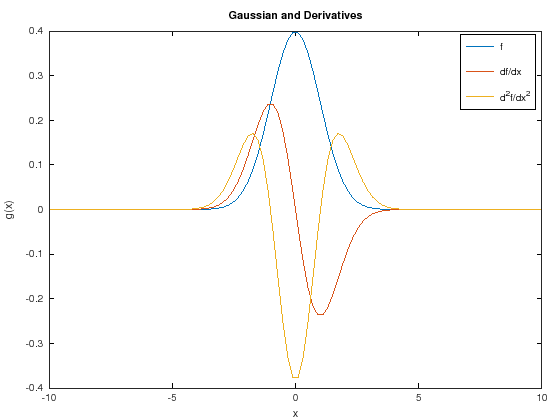

In [7]:
x = linspace(-10, 10, 100);      # Define finer mesh for domain
f = exp(-x.^2./2)./sqrt(2*pi);   # Define range as Gaussian - note vectorization works the same as numpy
d = derivative(-10,10,100);      # Define derivative matrix to match domain mesh
plot(x,f)                        # Plot range vs. domain
hold()                           # Make next plots use the same figure
plot(x, d*f')                    # Plot first derivative
plot(x, d*d*f')                  # Plot second derivative
legend("f","df/dx","d^2f/dx^2")  # Add a legend - note that python could label each plot, but MATLAB cannot, so must explicitly label here
title("Gaussian and Derivatives")
xlabel("x")
ylabel("g(x)")

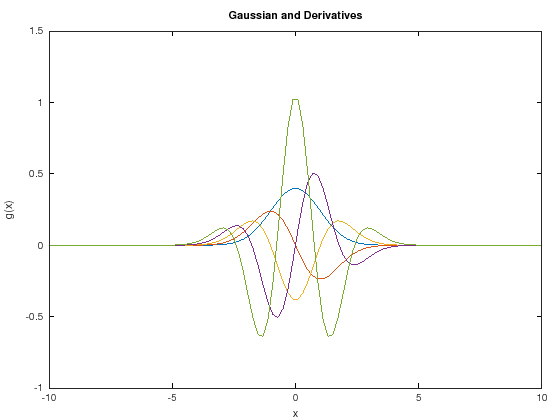

In [8]:
plot(x,f)
hold()
g = f';
for i = 1:4       # for loops work similarly to python (and are similarly slow) - instead of in, use =
  g = d*g;
  plot(x,g)
end
title("Gaussian and Derivatives")
xlabel("x")
ylabel("g(x)")

## Exercises

Below are exercises you can do for your own benefit, if you would like to play with MATLAB and learn its differences from python.

MATLAB play:

1. Install and open MATLAB on your machine.
1. Create a function file `derivative.m` containing the function definition above.
1. Verify that the function works in the MATLAB interpreter, after the file exists.
1. Create a script `plot_derivative.m` containing the rest of the code above.
1. Verify that running the script produces all the output that you expect.
1. Browse the extensive MATLAB help to get a feel for what else the language can do: https://www.mathworks.com/help

Python play:

1. Install Anaconda Python on your own machine, which includes everything you need from what we've learned in this course.
1. Redo the above examples in python/numpy/matplotlib on your own computer, using the popular Spyder editor included in Anaconda. This editor is made deliberately similar to the MATLAB interface, if you like that style of productivity.
